In [5]:
# Basic Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

# Webscrapping Imports
from bs4 import BeautifulSoup       
import regex as re

# NLP Imports
from nltk.corpus import stopwords
from wordcloud import WordCloud, ImageColorGenerator
import nltk
from textblob import TextBlob, Word
import spacy

# Modelling Imports
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Ignore warnings
import warnings
def ignore_warn(*args,**kwargs):
    pass
warnings.warn=ignore_warn

### Importing Data

In [6]:
blogdf= pd.read_csv("./blogging.csv")
writedf= pd.read_csv("./write.csv")

In [7]:
blogdf.head(5)

,Unnamed: 0,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,...,parent_whitelist_status,stickied,url,subreddit_subscribers,created_utc,num_crossposts,media,is_video,call_to_action,author_cakeday
0,0,NaN,Blogging,All feedback requests should be posted here. F...,t2_b65g2,False,NaN,0,False,March Feedback Thread - Post your feedback req...,...,all_ads,True,https://www.reddit.com/r/Blogging/comments/t44...,102123,1.646129e+09,0,NaN,False,NaN,NaN
1,1,NaN,Blogging,Hello bloggers\n\nIf you're a blogger with si...,t2_b65g2,False,NaN,0,False,Attention Bloggers! Ask Your Questions In This...,...,all_ads,True,https://www.reddit.com/r/Blogging/comments/t44...,102123,1.646129e+09,0,NaN,False,NaN,NaN
2,2,NaN,Blogging,Which do you use and why? Or do you use both? ...,t2_bv46v1qp,False,NaN,0,False,UA vs GA4? Google analytics,...,all_ads,False,https://www.reddit.com/r/Blogging/comments/tal...,102123,1.646870e+09,0,NaN,False,NaN,NaN
3,3,NaN,Blogging,I was doing really good at keeping up with my ...,t2_89cropsa,False,NaN,0,False,Help! I've fallen off the wagon.,...,all_ads,False,https://www.reddit.com/r/Blogging/comments/ta8...,102123,1.646836e+09,0,NaN,False,NaN,NaN
4,4,NaN,Blogging,My issue is I don't know how to create a page ...,t2_ia3dyt94,False,NaN,0,False,"In Blogger/Blogspot, I want to add a tab ""Home...",...,all_ads,False,https://www.reddit.com/r/Blogging/comments/tap...,102123,1.646882e+09,0,NaN,False,NaN,NaN


In [8]:
writedf.head()

,Unnamed: 0,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,...,media,is_video,link_flair_template_id,call_to_action,post_hint,preview,crosspost_parent_list,url_overridden_by_dest,crosspost_parent,author_cakeday
0,0,NaN,writing,**Welcome to our daily discussion thread!** ...,t2_6l4z3,False,NaN,0,False,[Daily Discussion] General Discussion- March 0...,...,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,writing,Your critique submission should be a top-level...,t2_6l4z3,False,NaN,0,False,[Weekly Critique and Self-Promotion Thread] Po...,...,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,writing,Over the past several days I have seen many qu...,t2_k6llc0bh,False,NaN,0,False,You need to read more poetry,...,NaN,False,c50f6efa-ba73-11e2-a315-12313d18884c,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,NaN,writing,I feel like the semi colon (at least in formal...,t2_5j1lv7z,False,NaN,0,False,I wish we were allowed to use the semi colon “...,...,NaN,False,bddffadc-ba73-11e2-ad02-12313d169640,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,NaN,writing,"At some point, every one of us has been a begi...",t2_agdwd1zt,False,NaN,0,False,"""Beginner"" Questions vs Lazy Questions",...,NaN,False,4432c050-d13b-11e7-998b-0e4fbedd5b18,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
print(f'Blogging dataframe Shape: {blogdf.shape}')
print(f'Writing dataframe DF Shape: {writedf.shape}')

Blogging dataframe Shape: (510, 108)
Writing dataframe DF Shape: (686, 115)


### Selecting Columns

In [10]:
cols = ['id','title','selftext','author','ups','num_comments','view_count','created_utc']

In [11]:
blog = pd.DataFrame()
write = pd.DataFrame()
blog = blogdf[cols] 
write = writedf[cols]

In [12]:
blog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            510 non-null    object 
 1   title         510 non-null    object 
 2   selftext      510 non-null    object 
 3   author        510 non-null    object 
 4   ups           510 non-null    int64  
 5   num_comments  510 non-null    int64  
 6   view_count    0 non-null      float64
 7   created_utc   510 non-null    float64
dtypes: float64(2), int64(2), object(4)
memory usage: 32.0+ KB


In [13]:
write.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            686 non-null    object 
 1   title         686 non-null    object 
 2   selftext      679 non-null    object 
 3   author        686 non-null    object 
 4   ups           686 non-null    int64  
 5   num_comments  686 non-null    int64  
 6   view_count    0 non-null      float64
 7   created_utc   686 non-null    float64
dtypes: float64(2), int64(2), object(4)
memory usage: 43.0+ KB


#### Observations from datatype info

It appears that 'created_utc' is in float format. We will dive deeper into the data and see if we have to change datatype.

View_count appears to be null for all posts across both subreddits. Believe that this attribute is not in use.

There are null values for writing's selftext. This is crucial for us to remove, otherwise it will affect our modelling/data exploration

In [14]:
blog['view_count'].isnull().sum()

510

In [15]:
write['view_count'].isnull().sum()

686

In [16]:
# droping the 'view_count' column as there are no information we can extract from it

print(f'Blogging dataframe Shape: {blog.shape}')
print(f'Writing dataframe DF Shape: {write.shape}')

Blogging dataframe Shape: (510, 8)
Writing dataframe DF Shape: (686, 8)


In [17]:
blog.drop(columns='view_count',inplace=True)
write.drop(columns='view_count',inplace=True)

In [18]:
write.dropna(subset =['selftext'],inplace=True)

In [19]:
print(f'Blogging dataframe Shape: {blog.shape}')
print(f'Writing dataframe DF Shape: {write.shape}')

Blogging dataframe Shape: (510, 7)
Writing dataframe DF Shape: (679, 7)


### Checking Data Range 

In [20]:
write['created_utc'].describe()

count    6.790000e+02
mean     1.646209e+09
std      4.299094e+05
min      1.645404e+09
25%      1.645823e+09
50%      1.646254e+09
75%      1.646593e+09
max      1.646886e+09
Name: created_utc, dtype: float64

In [21]:
write[['created_utc']].head()

,created_utc
0,1.646834e+09
1,1.646432e+09
2,1.646835e+09
3,1.646801e+09
4,1.646866e+09


In [22]:
write['date_created'] = pd.to_datetime(write['created_utc'], unit = 's')
write[['date_created']].head()

,date_created
0,2022-03-09 14:00:11
1,2022-03-04 22:15:08
2,2022-03-09 14:15:28
3,2022-03-09 04:45:10
4,2022-03-09 22:53:15


In [23]:
blog['date_created'] = pd.to_datetime(blog['created_utc'], unit = 's')
blog[['date_created']].head()

,date_created
0,2022-03-01 10:02:33
1,2022-03-01 10:03:25
2,2022-03-10 00:00:48
3,2022-03-09 14:24:42
4,2022-03-10 03:07:30


In [24]:
print('This is the Blogging Subreddit datarange')
blog[['date_created']].describe()

This is the Blogging Subreddit datarange


,date_created
count,510
unique,510
top,2021-12-06 13:14:42
freq,1
first,2021-11-10 17:36:29
last,2022-03-10 03:07:30


In [25]:
print('This is the Writing Subreddit datarange')
write[['date_created']].describe()

This is the Writing Subreddit datarange


,date_created
count,679
unique,679
top,2022-02-23 20:22:27
freq,1
first,2022-02-21 00:47:38
last,2022-03-10 04:25:29


#### Observations 

From the data above, we can conclude that "writing" subreddit is much more active than "blogging" subreddit. 

With the max number of posts allowed for us to scrape from Reddit, the date range for "Writing" is much narrower than "Blogging".

Date range for "Blogging" is from 25th June to 5th September 2020

Date range for "Writing" is from 21st August to 5th September 2020

#### Analysis for Unique Posts on Subreddit


In [26]:
write.sort_values('ups',ascending=False)[['title','selftext','ups','num_comments','author','date_created']].head(10)

,title,selftext,ups,num_comments,author,date_created
92,"Personal Opinion As an Editor: Ideas Are NOT ""...",I'm an acquiring editor in publishing (genre f...,1398,314,healthygenxer,2022-03-07 02:58:36
382,"You ever have an idea for a novel, get really ...",Someone already wrote basically the same exact...,1146,349,Neptune2284,2022-02-28 10:25:11
325,"""A book came out that's similar to my MS, help...","So, I’ve seen a bunch of these threads in r/wr...",1129,215,kiwibreakfast,2022-03-01 23:19:25
204,I can’t believe how much the Brandon Sanderson...,Almost $21 million as I write this. That is an...,995,469,Dazzling_Resort1732,2022-03-04 16:06:13
513,"I'm a self published author, and I don't care ...",...does that make me weird?\n\nLet me rephrase...,871,176,kilomike71,2022-02-24 18:14:02
244,Honest question - would you accept $500 to gho...,Please don’t downvote. I’m just curious. Just ...,672,601,-OQO-,2022-03-03 19:08:37
162,If you could give me one tip that changed your...,"For me it was to avoid using the word ""say"" an...",655,368,powercat21,2022-03-05 23:53:39
556,Do you also find yourself making a mostly “one...,So I’m making my cast of characters and I’m fo...,641,268,jhonathan_Z_star,2022-02-23 13:47:26
494,Getting a PhD may have killed my writing skills,"As a teen and undergrad, I was able to write i...",632,104,SiberianIcebreaker,2022-02-25 12:58:14
350,"10 simple tips for getting over “Oh no, I want...","1. If you believe you suck so much, why don’t ...",631,41,ThatAnimeSnob,2022-03-01 11:00:30


In [27]:
write.sort_values('num_comments',ascending=False)[['title','selftext','ups','num_comments','author','date_created']].head(10)

,title,selftext,ups,num_comments,author,date_created
244,Honest question - would you accept $500 to gho...,Please don’t downvote. I’m just curious. Just ...,672,601,-OQO-,2022-03-03 19:08:37
204,I can’t believe how much the Brandon Sanderson...,Almost $21 million as I write this. That is an...,995,469,Dazzling_Resort1732,2022-03-04 16:06:13
162,If you could give me one tip that changed your...,"For me it was to avoid using the word ""say"" an...",655,368,powercat21,2022-03-05 23:53:39
128,How to describe dark skin tones without using ...,I have to describe the skin colour of a man in...,455,351,Sad_Pringles,2022-03-06 18:00:47
382,"You ever have an idea for a novel, get really ...",Someone already wrote basically the same exact...,1146,349,Neptune2284,2022-02-28 10:25:11
100,"Too many stories to tell, not enough decades t...",I have a dilemma. I recently turned 38. I have...,204,345,Picard37,2022-03-07 11:15:30
13,Why is it always a trilogy?,Everyone and their mama is writing a trilogy a...,471,316,missile_lily,2022-03-08 19:00:49
92,"Personal Opinion As an Editor: Ideas Are NOT ""...",I'm an acquiring editor in publishing (genre f...,1398,314,healthygenxer,2022-03-07 02:58:36
136,Trying to find a pen name because my real name...,A rant:\n\nBasically I have a last name that s...,472,296,Chilicheesedragon5,2022-03-06 12:55:37
556,Do you also find yourself making a mostly “one...,So I’m making my cast of characters and I’m fo...,641,268,jhonathan_Z_star,2022-02-23 13:47:26


In [28]:
write['author'].value_counts()

AutoModerator           17
dreams_and_dragons       4
Logical-Survey1367       4
write-owl                4
Inevitable-Custard32     4
                        ..
geekstoreclerk           1
xnvrdarren               1
olsenprime               1
InTheInterestOfTime      1
Coinocus                 1
Name: author, Length: 604, dtype: int64

In [29]:
write[write['author']=='AutoModerator'][['title','selftext']]

,title,selftext
0,[Daily Discussion] General Discussion- March 0...,**Welcome to our daily discussion thread!** ...
1,[Weekly Critique and Self-Promotion Thread] Po...,Your critique submission should be a top-level...
89,"[Daily Discussion] Brainstorming- March 08, 2022",**Welcome to our daily discussion thread!** ...
132,"[Daily Discussion] Writer's Block, Motivation,...",**Welcome to our daily discussion thread!** ...
182,"[Daily Discussion] Writing Tools, Software, an...",**Welcome to our daily discussion thread!** ...
210,[Daily Discussion] First Page Feedback- March ...,**Welcome to our daily discussion thread!** ...
257,"[Daily Discussion] Brainstorming- March 04, 2022",**Welcome to our daily discussion thread!** ...
303,"[Daily Discussion] Writer's Block, Motivation,...",**Welcome to our daily discussion thread!** ...
356,[Daily Discussion] General Discussion- March 0...,**Welcome to our daily discussion thread!** ...
391,"[Daily Discussion] Brainstorming- March 01, 2022",**Welcome to our daily discussion thread!** ...


In [30]:
write[write['title'].str.contains('Weekly')][['title','ups','num_comments']]

,title,ups,num_comments
1,[Weekly Critique and Self-Promotion Thread] Po...,25,134


In [31]:
write[write['title'].str.contains('Daily')][['title','ups','num_comments']]

,title,ups,num_comments
0,[Daily Discussion] General Discussion- March 0...,0,27
89,"[Daily Discussion] Brainstorming- March 08, 2022",4,66
132,"[Daily Discussion] Writer's Block, Motivation,...",6,18
182,"[Daily Discussion] Writing Tools, Software, an...",8,12
210,[Daily Discussion] First Page Feedback- March ...,3,32
257,"[Daily Discussion] Brainstorming- March 04, 2022",10,41
303,"[Daily Discussion] Writer's Block, Motivation,...",9,12
356,[Daily Discussion] General Discussion- March 0...,3,14
391,"[Daily Discussion] Brainstorming- March 01, 2022",2,55
428,"[Daily Discussion] Writer's Block, Motivation,...",8,13


In [34]:
# Analysing the posts of another user 

write[write['author']=='Logical-Survey1367'][['title','selftext','date_created']]

,title,selftext,date_created
308,How much should I worry about chapter length?,Does it matter if each chapter is around the s...,2022-03-03 23:20:55
369,Questions about Traditional Publishing,Does getting a book traditionally published gu...,2022-03-02 09:08:35
427,how to not be intimidated when writing my firs...,I started writing when i was in high school. F...,2022-03-01 01:48:50
515,Mystery/Romance novel ideal word count? (First...,"Hey everyone, \n\nWriting my first ever novel....",2022-02-26 06:26:12


#### Observations 

We observe that there are posts that are regular in basis (by having an initial analysis of subreddit webpage).

Now, we are trying to filter out posts that are regular, posted by 'AutoModerator'

In [35]:
blog.sort_values('ups',ascending=False)[['title','selftext','ups','num_comments','author','date_created']].head(10)

,title,selftext,ups,num_comments,author,date_created
382,My article is ranking first on Google for my t...,I'm just so excited and I wanted to share with...,89,25,ScreenHype,2021-12-16 01:30:13
34,Just passed 1k views in 21 days. My friends ar...,Just figured I should share here because my fr...,87,21,madden_tron,2022-03-04 19:37:47
106,My First 1000 View Month!,I hit 1000 views this month for the first time...,81,33,KindaBoringTravel,2022-02-18 18:04:23
358,Please stop linking to Amazon,It’s no secret that Jeff Bezos is a terrible p...,73,32,ashley96mc,2021-12-25 18:26:12
293,My small victory. First of 4 websites starting...,Stats for start of my MEDIA EMPIRE. Lol\n\nDe...,71,44,juxtaposedposse,2022-01-10 13:45:43
323,Anyone willing to share what a money making bl...,I know this might not be something you want to...,56,40,harlsey,2022-01-02 15:41:57
475,Progress after roughly 90 days of starting my ...,https://ibb.co/BBLv5yc\n\nThought I'd share wh...,56,46,StarrkC,2021-11-18 13:10:31
183,Tips for new bloggers: Research ahead of time,A cool tip I heard from income school or most ...,50,23,BigHerring,2022-02-05 22:33:01
403,"Pinterest used to be great for traffic, now it...","I have a website that I've ran since 2012, tha...",48,29,Zanko95,2021-12-10 11:28:47
419,I published my 50th blog post today!,"For the first 1 year, my goal was to sell serv...",47,18,Some_SEO_Guy,2021-12-05 04:46:53


In [36]:
blog.sort_values('num_comments',ascending=False)[['title','selftext','ups','num_comments','author','date_created']].head(10)

,title,selftext,ups,num_comments,author,date_created
330,January Feedback Thread - Post your feedback r...,All feedback requests should be posted here. F...,12,133,Selaen,2022-01-01 16:40:13
276,Attention Bloggers! Ask Your Questions In This...,Hello bloggers\n\nIf you're a blogger with si...,7,128,Selaen,2022-01-15 16:24:51
274,Do any of you blog just for fun and not for mo...,I'm looking to get into blogging primarily bec...,38,98,CromulentSlacker,2022-01-16 06:24:24
203,February Feedback Thread - Post your feedback ...,All feedback requests should be posted here. F...,9,88,Selaen,2022-02-03 08:56:27
441,Attention Bloggers! Ask Your Questions In This...,Hello bloggers\n\nIf you're a blogger with sim...,6,84,Selaen,2021-12-01 14:11:02
169,Blogging success without social media?,Has anyone grown a blog to at least 5k/mo orga...,36,78,semico6,2022-02-07 14:22:01
372,I have been blogging for a year and can finall...,I started a blog as a hobby during lock down t...,39,71,Minddoesntstop,2021-12-20 23:58:46
383,Attention Bloggers! Ask Your Questions In This...,Hello bloggers\n\nIf you're a blogger with sim...,3,59,Selaen,2021-12-16 13:24:32
44,A stay-at-home dad asks: How viable is bloggin...,Basically the title text.\n\nI'm a stay-at-hom...,28,59,FF_Ninja,2022-03-03 20:40:52
145,Has anyone wrote 200+ blog posts and get no tr...,"Has anyone “done the work”. Hustled, wrote a l...",27,57,DanMorristar,2022-02-12 21:46:24


In [37]:
blog['author'].value_counts()

rasparentes          34
BigHerring           13
Selaen               12
Navtej_7              8
metal_tangerine       7
                     ..
Wickey312             1
jetblack-pope         1
joytothepixelstiq     1
Stepanovna            1
berry_lush            1
Name: author, Length: 349, dtype: int64

In [39]:
# Analysing the posts of another user 

blog[blog['author']=='BigHerring'][['title','selftext','date_created']]

,title,selftext,date_created
160,"Is the ""average position"" inaccurate in GSC?",So I see a lot of impressions from my statisti...,2022-02-09 12:46:18
183,Tips for new bloggers: Research ahead of time,A cool tip I heard from income school or most ...,2022-02-05 22:33:01
190,Is competing with video snippets going to be h...,For some of my keywords there are snippets at ...,2022-02-05 01:58:48
208,Heavy Tanking In Page Speed Due to google ads ...,Im getting pretty poor scores like 30-40 page ...,2022-02-02 22:55:51
223,Anyone posting 2-3 times a day?,I find my blog to be pretty fun to write about...,2022-01-31 07:24:41
230,Whats the consensus on copyrighted images?,Ive been back and forth on this topic for a wh...,2022-01-30 01:05:45
238,Do you guys think page views count if theyre c...,Ive been posting a lot of my posts to some sub...,2022-01-27 01:56:24
255,How’d you end up templatizing your posts?,I basically have a set structure for every pos...,2022-01-22 06:16:10
265,Am I getting hacked? Almost 7k page views in a...,I launched my site on Jan 15th and just a day ...,2022-01-19 04:57:30
282,Questions About Blog Posts and URL,1) Is it ever bad to post multiple blogs in on...,2022-01-13 20:01:58


In [40]:
blog[blog['author']=='Selaen']

,id,title,selftext,author,ups,num_comments,created_utc,date_created
0,t44jvc,March Feedback Thread - Post your feedback req...,All feedback requests should be posted here. F...,Selaen,2,11,1.646129e+09,2022-03-01 10:02:33
1,t44kbm,Attention Bloggers! Ask Your Questions In This...,Hello bloggers\n\nIf you're a blogger with si...,Selaen,5,37,1.646129e+09,2022-03-01 10:03:25
123,su0r2n,Attention Bloggers! Ask Your Questions In This...,Hello bloggers\n\nIf you're a blogger with si...,Selaen,4,24,1.645031e+09,2022-02-16 16:58:50
203,sjegx2,February Feedback Thread - Post your feedback ...,All feedback requests should be posted here. F...,Selaen,9,88,1.643879e+09,2022-02-03 08:56:27
205,sjehdf,Attention Bloggers! Ask Your Questions In This...,Hello bloggers\n\nIf you're a blogger with si...,Selaen,6,26,1.643879e+09,2022-02-03 08:57:22
276,s4nwx9,Attention Bloggers! Ask Your Questions In This...,Hello bloggers\n\nIf you're a blogger with si...,Selaen,7,128,1.642264e+09,2022-01-15 16:24:51
330,rtmxmw,January Feedback Thread - Post your feedback r...,All feedback requests should be posted here. F...,Selaen,12,133,1.641055e+09,2022-01-01 16:40:13
331,rtmyk4,Attention Bloggers! Ask Your Questions In This...,Hello bloggers\n\nIf you're a blogger with sim...,Selaen,8,54,1.641055e+09,2022-01-01 16:41:30
383,rhqo2u,Attention Bloggers! Ask Your Questions In This...,Hello bloggers\n\nIf you're a blogger with sim...,Selaen,3,59,1.639661e+09,2021-12-16 13:24:32
441,r6flw1,Attention Bloggers! Ask Your Questions In This...,Hello bloggers\n\nIf you're a blogger with sim...,Selaen,6,84,1.638368e+09,2021-12-01 14:11:02


In [41]:
blog[blog['title'].str.contains('Thread')]

,id,title,selftext,author,ups,num_comments,created_utc,date_created
0,t44jvc,March Feedback Thread - Post your feedback req...,All feedback requests should be posted here. F...,Selaen,2,11,1.646129e+09,2022-03-01 10:02:33
1,t44kbm,Attention Bloggers! Ask Your Questions In This...,Hello bloggers\n\nIf you're a blogger with si...,Selaen,5,37,1.646129e+09,2022-03-01 10:03:25
123,su0r2n,Attention Bloggers! Ask Your Questions In This...,Hello bloggers\n\nIf you're a blogger with si...,Selaen,4,24,1.645031e+09,2022-02-16 16:58:50
203,sjegx2,February Feedback Thread - Post your feedback ...,All feedback requests should be posted here. F...,Selaen,9,88,1.643879e+09,2022-02-03 08:56:27
205,sjehdf,Attention Bloggers! Ask Your Questions In This...,Hello bloggers\n\nIf you're a blogger with si...,Selaen,6,26,1.643879e+09,2022-02-03 08:57:22
276,s4nwx9,Attention Bloggers! Ask Your Questions In This...,Hello bloggers\n\nIf you're a blogger with si...,Selaen,7,128,1.642264e+09,2022-01-15 16:24:51
330,rtmxmw,January Feedback Thread - Post your feedback r...,All feedback requests should be posted here. F...,Selaen,12,133,1.641055e+09,2022-01-01 16:40:13
331,rtmyk4,Attention Bloggers! Ask Your Questions In This...,Hello bloggers\n\nIf you're a blogger with sim...,Selaen,8,54,1.641055e+09,2022-01-01 16:41:30
383,rhqo2u,Attention Bloggers! Ask Your Questions In This...,Hello bloggers\n\nIf you're a blogger with sim...,Selaen,3,59,1.639661e+09,2021-12-16 13:24:32
441,r6flw1,Attention Bloggers! Ask Your Questions In This...,Hello bloggers\n\nIf you're a blogger with sim...,Selaen,6,84,1.638368e+09,2021-12-01 14:11:02


#### Observations 

From the table above sorted by num_comments, we see that "Selaen" has a number of posts with similar titles/selftext.

Further observations suggest that "Selaen" is a moderator for the subreddit. All of his posts are moderated posts.

Hence, the posts will be removed.

In [42]:
write[write['author']=='AutoModerator']['id'].nunique()

17

In [43]:
write.shape

(679, 8)

In [44]:
write = write[write['author'] != 'AutoModerator']

In [45]:
write.shape

(662, 8)

In [46]:
blog.shape

(510, 8)

In [47]:
blog[blog['author']=='Selaen']['id'].nunique()

12

In [48]:
blog = blog[blog['author']!='Selaen']

In [49]:
blog.shape

(498, 8)

#### Merging Dataframes 

Merge both Blog and Write dataframes into a single dataframe, and have a seperate column 'label' that maps 1 to blog, and 0 to write.

In [50]:
blog['label'] = 1
blog.shape

(498, 9)

In [51]:
write['label'] = 0
write.shape

(662, 9)

In [52]:
df = pd.concat([blog, write], axis=0)
df.shape

(1160, 9)

In [53]:
df['label'].value_counts()

0    662
1    498
Name: label, dtype: int64

In [54]:
df.head()

,id,title,selftext,author,ups,num_comments,created_utc,date_created,label
2,talcw2,UA vs GA4? Google analytics,Which do you use and why? Or do you use both? ...,Tvchick2297,3,2,1.646870e+09,2022-03-10 00:00:48,1
3,ta8wyf,Help! I've fallen off the wagon.,I was doing really good at keeping up with my ...,Mikaylalalalala_,11,10,1.646836e+09,2022-03-09 14:24:42,1
4,tap00p,"In Blogger/Blogspot, I want to add a tab ""Home...",My issue is I don't know how to create a page ...,Overall_Nectarine_56,1,0,1.646882e+09,2022-03-10 03:07:30,1
5,tamo0n,How should I name this category?,\n\nI am running a website about publishing N...,courtysim,1,2,1.646874e+09,2022-03-10 01:06:29,1
6,tabawm,Help Switching From Ezoic to Mediavine - Stubb...,I'm in the process of switching from Ezoic to ...,ConsciousYam,3,7,1.646843e+09,2022-03-09 16:17:14,1


In [55]:
df.duplicated().sum()

0

In [56]:
df['selftext'].isnull().sum()

0

In [57]:
df.dropna(subset=['selftext'],inplace=True)

In [58]:
df['selftext'].isnull().sum()

0

In [59]:
df['title'].isnull().sum()

0

### Data Exploration 


In [60]:
# Stopwords

newStopWords = ['write','blog','blogger','blogging','bloggers','wordpress','www','https','reddit','com']
stops = text.ENGLISH_STOP_WORDS.union(newStopWords)
len(stops)

328

#### Understanding Data for Blogging Subreddit

Titles & Texts: N-gram = 1 (Blogging)

In [61]:
cvec = CountVectorizer(stop_words = stops)

In [62]:
vec_b_title = cvec.fit_transform(blog['title'])

In [63]:
vec_b_title = pd.DataFrame(vec_b_title.toarray(), columns = cvec.get_feature_names())

In [64]:
blog_title_1 = vec_b_title.sum().sort_values(ascending=False)
blog_title_1.head(10)

google     33
help       29
writing    28
content    27
posts      26
best       23
make       23
traffic    23
site       22
post       22
dtype: int64

In [65]:
vec_b_text = cvec.fit_transform(blog['selftext'])

In [66]:
vec_b_text = pd.DataFrame(vec_b_text.toarray(), columns = cvec.get_feature_names())

In [67]:
blog_text_1 = vec_b_text.sum().sort_values(ascending=False)
blog_text_1.head(10)

just       304
like       254
site       210
don        207
want       204
content    194
traffic    178
ve         178
posts      167
google     165
dtype: int64

#### 
Titles & Texts: N-gram = 2/3 (Blogging)

In [68]:
cvec23 = CountVectorizer(stop_words = stops,ngram_range=(2, 3))

In [69]:
vec_b_title23 = cvec23.fit_transform(blog['title'])

In [70]:
vec_b_title23 = pd.DataFrame(vec_b_title23.toarray(), columns = cvec23.get_feature_names())

In [71]:
blog_title_23 = vec_b_title23.sum().sort_values(ascending=False)
blog_title_23.head(10)

need help           6
best way            5
social media        5
page views          4
google analytics    4
best place          3
multiple blogs      3
make money          3
website traffic     3
content writing     3
dtype: int64

In [72]:
vec_b_text23 = cvec23.fit_transform(blog['selftext'])

In [73]:
vec_b_text23 = pd.DataFrame(vec_b_text23.toarray(), columns = cvec23.get_feature_names())

In [74]:
blog_text_23 = vec_b_text23.sum().sort_values(ascending=False)
blog_text_23.head(10)

don want            42
social media        41
amp x200b           35
don know            33
feel like           22
page views          18
make money          15
google analytics    15
just started        14
don think           14
dtype: int64

#### Understanding Data for Writing Subreddit

Titles & Texts: N-gram = 1 (Writing) 

In [75]:
vec_w_title = cvec.fit_transform(write['title'])

In [76]:
vec_w_title = pd.DataFrame(vec_w_title.toarray(), columns = cvec.get_feature_names())

In [77]:
write_title_1 = vec_w_title.sum().sort_values(ascending=False)
write_title_1.head(10)

writing       130
story          66
book           36
novel          32
character      32
advice         32
stories        27
characters     25
writer         23
work           23
dtype: int64

In [78]:
vec_w_text = cvec.fit_transform(write['selftext'])

In [79]:
vec_w_text = pd.DataFrame(vec_w_text.toarray(), columns = cvec.get_feature_names())

In [80]:
write_text_1 = vec_w_text.sum().sort_values(ascending=False)
write_text_1.head(10)

writing    677
like       514
story      472
just       449
ve         338
know       330
don        297
want       283
time       231
book       216
dtype: int64

#### 
Titles & Texts: N-gram = 2/3 (Writing)

In [81]:
cvec23 = CountVectorizer(stop_words = stops,ngram_range=(2, 3))

In [82]:
vec_w_title23 = cvec23.fit_transform(write['title'])

In [83]:
vec_w_title23 = pd.DataFrame(vec_w_title23.toarray(), columns = cvec23.get_feature_names())

In [84]:
write_title_23 = vec_w_title23.sum().sort_values(ascending=False)
write_title_23.head(10)

need help         7
start writing     6
advice writing    5
short story       5
non fiction       4
new writer        4
short stories     4
writing book      4
need advice       3
writer block      3
dtype: int64

In [85]:
vec_w_text23 = cvec23.fit_transform(write['selftext'])

In [86]:
vec_w_text23 = pd.DataFrame(vec_w_text23.toarray(), columns = cvec23.get_feature_names())

In [87]:
write_text_23 = vec_w_text23.sum().sort_values(ascending=False)
write_text_23.head(10)

don know          82
feel like         72
don want          35
amp x200b         28
short stories     26
main character    24
like writing      24
short story       23
feels like        22
writing novel     21
dtype: int64

### Word Cloud 

In [88]:
from matplotlib.colors import LinearSegmentedColormap
colors = ["#000000", "#111111", "#101010", "#121212", "#212121", "#222222"]
cmap = LinearSegmentedColormap.from_list("mycmap", colors)

blog_title_wc = WordCloud(width = 1200, height = 900, background_color ='white',
                  colormap=cmap).generate_from_frequencies(blog_title_1) 

write_title_wc = WordCloud(width = 1200, height = 900, background_color ='white',
                  colormap=cmap).generate_from_frequencies(write_title_1) 

blog_text_wc = WordCloud(width = 1200, height = 900, background_color ='white',
                  colormap=cmap).generate_from_frequencies(blog_text_23) 

write_text_wc = WordCloud(width = 1200, height = 900, background_color ='white',
                  colormap=cmap).generate_from_frequencies(write_text_23) 

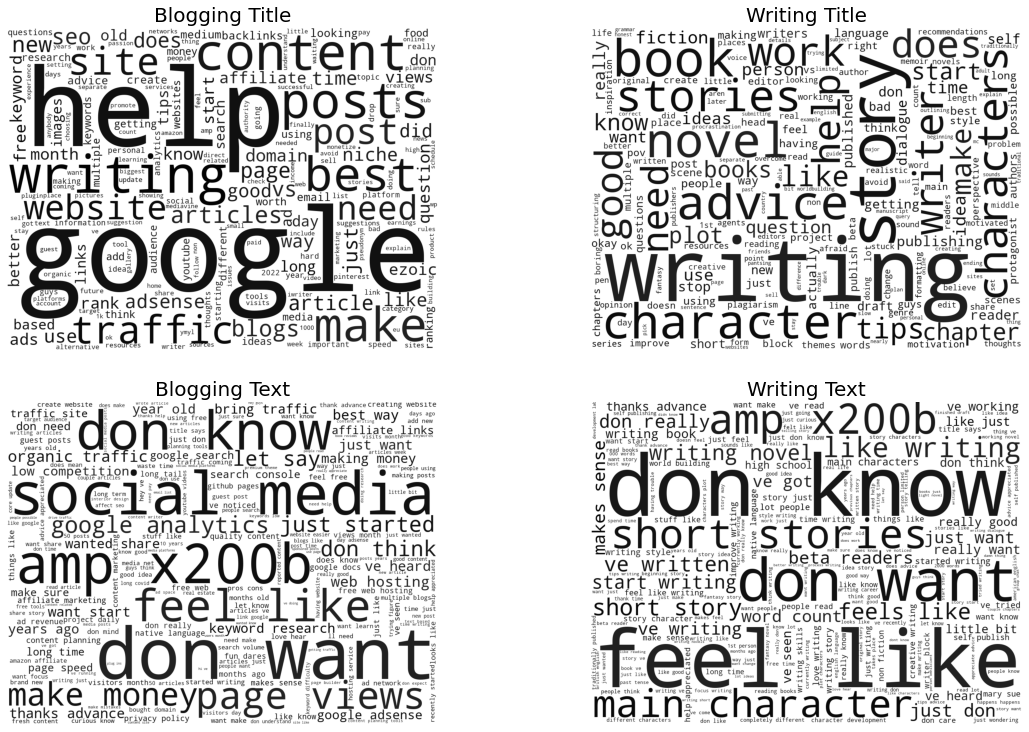

In [89]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (18, 10))
ax[0,0].imshow(blog_title_wc)
ax[0,1].imshow(write_title_wc)
ax[1,0].imshow(blog_text_wc)
ax[1,1].imshow(write_text_wc)

ax[0,0].set_title('Blogging Title',size=20)
ax[0,1].set_title('Writing Title',size=20)
ax[1,0].set_title('Blogging Text',size=20)
ax[1,1].set_title('Writing Text',size=20)

ax[0,0].axis('off')
ax[0,1].axis('off')
ax[1,0].axis('off')
ax[1,1].axis('off')

plt.tight_layout(h_pad = 3.0,pad=0.1)

#### Observations

I have chosen to use 1 N-gram for Title and 2-3 N-grams for text messages. This is because Titles tend to be shorter than text bodies, and I would like to see which words are most commonly used for each subreddit. Similarly, I have chosen to use 2-3 Ngrams for text bodies because I would like to see which short phrases do people most commonly use in each subreddit.
From the above text, we can observe that there are words have not been stemmed, hence having multiple appearances despite being the same 'root' word.

#### Blogging:

By the looks of it, blogging posts and titles tend to be very website-driven. This means that there is a huge emphasis on promotion of their blogs. This is observed by words/phases including "website, search console, keyword search, social media, google search,seo". There seem to be less emphasis on the writing aspect of blogging.
This shows that users who post on Blogging subreddit are bloggers who have an intention of promoting their blog by understanding how to optimise search engines, social medias etc.
Tonality of the words that appear in the word cloud suggest that users are more goal-oriented, assertive. Most words that appear do not have an outright 'positive' or 'negative' connotation.

#### Writing:

On the other hand, writing posts and titles suggest that users are seeking a community to seek moral support and guidance on their writing. The writing subreddit group seems slightly less professional and more supportive than blogging subreddit group.
This is observed by words/phrases including 'writing advice, don know, dont want, help writing, start writing' etc.

#### Overall:

From a first impression perspective, I believe that users for blogging subreddit are more professional, less vulnerable and more assertive. It seems like a professional community rather than a friendly community, like Writing subreddit.
Users for writing subreddit are heavily inclined to improving their stories/writings rather than promotion of their work, unlike Blogging subreddit.

#### Overlapping Users
We check if there are any users that are overlapping in these two subreddit, based on our posts scraped. This is to check the similarities between the user base for both subreddits, given that both are rather similar topics in general.

In [90]:
write_author = set(df[df['label']==0]['author'])
blog_author = set(df[df['label']==1]['author'])

In [91]:
write_author & blog_author

# There are no overlapping user or users with dual participation for blogs and writings 

{'[deleted]'}

#### Length of Posts 

In [92]:
df['length_text'] = [len(i.split()) for i in df['selftext']]
df['length_title'] = [len(i.split()) for i in df['title']]

In [94]:
df.head()

,id,title,selftext,author,ups,num_comments,created_utc,date_created,label,length_text,length_title
2,talcw2,UA vs GA4? Google analytics,Which do you use and why? Or do you use both? ...,Tvchick2297,3,2,1.646870e+09,2022-03-10 00:00:48,1,17,5
3,ta8wyf,Help! I've fallen off the wagon.,I was doing really good at keeping up with my ...,Mikaylalalalala_,11,10,1.646836e+09,2022-03-09 14:24:42,1,74,6
4,tap00p,"In Blogger/Blogspot, I want to add a tab ""Home...",My issue is I don't know how to create a page ...,Overall_Nectarine_56,1,0,1.646882e+09,2022-03-10 03:07:30,1,19,35
5,tamo0n,How should I name this category?,\n\nI am running a website about publishing N...,courtysim,1,2,1.646874e+09,2022-03-10 01:06:29,1,59,6
6,tabawm,Help Switching From Ezoic to Mediavine - Stubb...,I'm in the process of switching from Ezoic to ...,ConsciousYam,3,7,1.646843e+09,2022-03-09 16:17:14,1,135,9


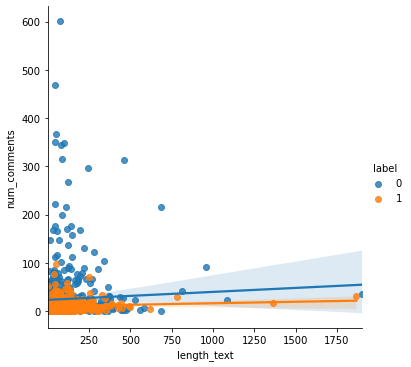

In [95]:
sns.lmplot(x='length_text',y='num_comments',data=df,hue='label');

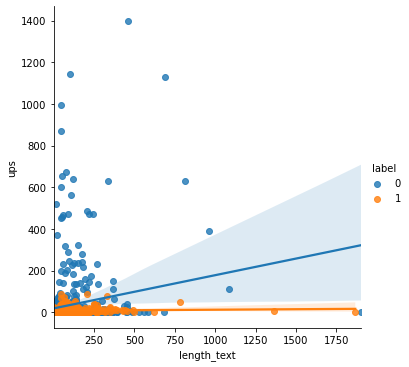

In [96]:
sns.lmplot(x='length_text',y='ups',data=df,hue='label');

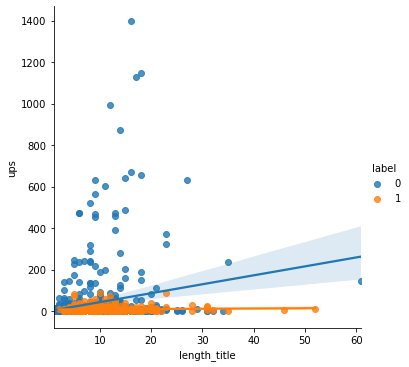

In [97]:
sns.lmplot(x='length_title',y='ups',data=df,hue='label');

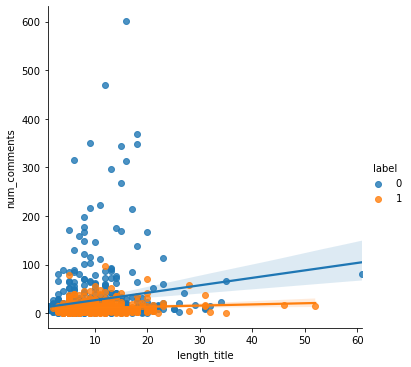

In [98]:
sns.lmplot(x='length_title',y='num_comments',data=df,hue='label');

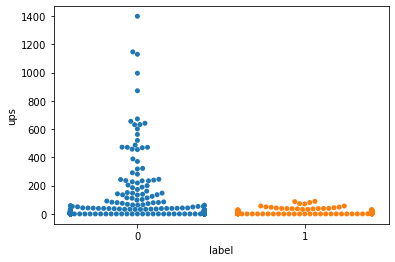

In [99]:
sns.swarmplot(x='label',y='ups',data=df);

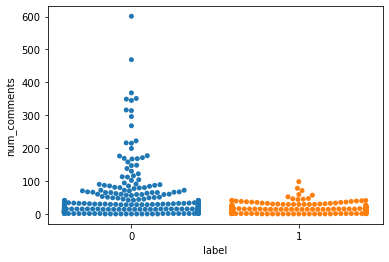

In [100]:
sns.swarmplot(x='label',y='num_comments',data=df);

#### Observations

##### There are few interesting observations that we can see from the four charts above:

Writing platform is definitely much more participative than blogging platform. This is seen by the stark difference between upvotes and comments for the two groups, regardless of length of title/post.

For blogging group, there seem to be little observable relationship between length of title/posts to number of comments/upvotes. This is seen by the flat regression line in orange.

For both subreddit groups, it is obvious that most posts and title fall within the lower range of the length spread.
It appears that having a shorter title/post will increase users' chance of having more upvotes/comments.

From the swarmplots, we observe that the spread of upvotes and num_comments for writing group is much greater than blogging group. The max number of upvotes for blogging group is significantly lower than writing group.

There appear to be few outliers that secured very high number of upvotes/comments across both groups. I will dive into these data to understand the rationale behind.

In [103]:
df[(df['label']==0) & (df['ups']>1000)]

,id,title,selftext,author,ups,num_comments,created_utc,date_created,label,length_text,length_title
92,t8ff84,"Personal Opinion As an Editor: Ideas Are NOT ""...",I'm an acquiring editor in publishing (genre f...,healthygenxer,1398,314,1.646622e+09,2022-03-07 02:58:36,0,462,16
325,t4le1p,"""A book came out that's similar to my MS, help...","So, I’ve seen a bunch of these threads in r/wr...",kiwibreakfast,1129,215,1.646177e+09,2022-03-01 23:19:25,0,688,17
382,t3cj16,"You ever have an idea for a novel, get really ...",Someone already wrote basically the same exact...,Neptune2284,1146,349,1.646044e+09,2022-02-28 10:25:11,0,102,18


#### 
By the looks of the data above, we can deduce that this post is a post that engages the community by tapping onto the common struggles/emotions of the society. That could be the reason why the post became viral in the writing group.

In [105]:
df[(df['label']==1) & (df['num_comments']>50)]

,id,title,selftext,author,ups,num_comments,created_utc,date_created,label,length_text,length_title
44,t615vv,A stay-at-home dad asks: How viable is bloggin...,Basically the title text.\n\nI'm a stay-at-hom...,FF_Ninja,28,59,1.646340e+09,2022-03-03 20:40:52,1,116,28
145,sr237m,Has anyone wrote 200+ blog posts and get no tr...,"Has anyone “done the work”. Hustled, wrote a l...",DanMorristar,27,57,1.644702e+09,2022-02-12 21:46:24,1,43,10
155,soncnx,How long did it take you to make tour first $1...,Me: 4 years😁😀\nYou: 👇🏻,glenn234156,21,52,1.644439e+09,2022-02-09 20:40:19,1,5,13
169,smre8u,Blogging success without social media?,Has anyone grown a blog to at least 5k/mo orga...,semico6,36,78,1.644244e+09,2022-02-07 14:22:01,1,41,5
274,s55i8j,Do any of you blog just for fun and not for mo...,I'm looking to get into blogging primarily bec...,CromulentSlacker,38,98,1.642314e+09,2022-01-16 06:24:24,1,54,12
372,rl0udk,I have been blogging for a year and can finall...,I started a blog as a hobby during lock down t...,Minddoesntstop,39,71,1.640045e+09,2021-12-20 23:58:46,1,249,20


#### Sentiment Analysis 

TextBlob 

In [106]:
def sentiment_fn(text):
    return TextBlob(text).sentiment.polarity

df['sentiment'] = df['selftext'].apply(sentiment_fn)

Average Sentiment Score for Blogging Posts: 0.136


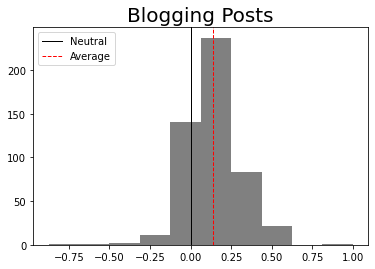

In [107]:
col1 = df[df['label'] == 1]['sentiment']
plt.hist(col1,color="grey")
plt.axvline(0, color='k', linewidth=1,label='Neutral')
plt.axvline(col1.mean(), color='r', linestyle='dashed', linewidth=1,label="Average")
plt.legend(loc='upper left')
plt.title('Blogging Posts',size=20)
mean1 = round(col1.mean(),3)
print(f'Average Sentiment Score for Blogging Posts: {mean1}');

Average Sentiment Score for Writing Posts: 0.108


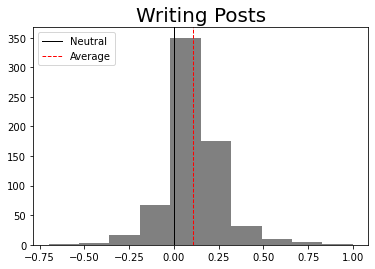

In [108]:
col0 = df[df['label'] == 0]['sentiment']
plt.hist(col0,color="grey")
plt.axvline(0, color='k', linewidth=1,label='Neutral')
plt.axvline(col0.mean(), color='r', linestyle='dashed', linewidth=1,label="Average")
plt.legend(loc='upper left')
plt.title('Writing Posts',size=20)
mean0 = round(col0.mean(),3)
print(f'Average Sentiment Score for Writing Posts: {mean0}');